In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from pylab import rcParams

In [61]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
rcParams['figure.figsize'] = 15, 6

In [42]:
#Загрузка данных с указанием правильной кодировки
sberbank_opendata = pd.read_csv("sberbankopendata.csv",encoding="cp1251")
sberbank_opendata["date"]=pd.to_datetime(sberbank_opendata["date"], dayfirst=True)
sberbank_opendata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74842 entries, 0 to 74841
Data columns (total 4 columns):
name      74842 non-null object
region    74842 non-null object
date      74842 non-null datetime64[ns]
value     74842 non-null int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.3+ MB


In [4]:
#Интерфейс пользователя
user_interest_number = int(input("Пожалуйста, выберете число - желаемый параметр для отображения: \n"
                          "1. Количество заявок на потребительские кредиты\n"
                          "2. Средняя сумма заявки на потребительский кредит\n"
                          "3. Количество заявок на ипотечные кредиты\n"
                          "4. Средняя сумма заявки на ипотечный кредит\n"
                          "5. Количество новых депозитов\n"
                          "6. Средняя сумма нового депозита\n"
                          "7. Средняя зарплата\n"
                          "8. Средняя пенсия\n"
                          "9. В среднем руб. на текущем счете на человека\n"
                          "10. В среднем депозитов в руб. на человека\n"
                          "11. Средние расходы по картам\n"
                          "12. Средний чек в формате Фастфуд\n"
                          "13. Средний чек в формате Ресторан\n"
                          "14. Средние траты в ресторане фастфуд\n"
                          "13. Средние траты в ресторане\n"))

Пожалуйста, выберете число - желаемый параметр для отображения: 
1. Количество заявок на потребительские кредиты
2. Средняя сумма заявки на потребительский кредит
3. Количество заявок на ипотечные кредиты
4. Средняя сумма заявки на ипотечный кредит
5. Количество новых депозитов
6. Средняя сумма нового депозита
7. Средняя зарплата
8. Средняя пенсия
9. В среднем руб. на текущем счете на человека
10. В среднем депозитов в руб. на человека
11. Средние расходы по картам
12. Средний чек в формате Фастфуд
13. Средний чек в формате Ресторан
14. Средние траты в ресторане фастфуд
13. Средние траты в ресторане
11


In [5]:
#Распознавание пользователького запроса
if user_interest_number == 1:
    user_column = "Количество заявок на потребительские кредиты"
elif user_interest_number == 2:
    user_column = "Средняя сумма заявки на потребительский кредит"
elif user_interest_number == 3:
    user_column = "Количество заявок на ипотечные кредиты"
elif user_interest_number == 4:
    user_column = "Средняя сумма заявки на ипотечный кредит"
elif user_interest_number == 5:
    user_column = "Количество новых депозитов"    
elif user_interest_number == 6:
    user_column = "Средняя сумма нового депозита"
elif user_interest_number == 7:
    user_column = "Средняя зарплата"
elif user_interest_number == 8:
    user_column = "Средняя пенсия"
elif user_interest_number == 9:
    user_column = "В среднем руб. на текущем счете на человека"
elif user_interest_number == 10:
    user_column = "В среднем депозитов в руб. на человека"
elif user_interest_number == 11:
    user_column = "Средние расходы по картам"
elif user_interest_number == 12:
    user_column = "Средний чек в формате Фастфуд"
elif user_interest_number == 13:
    user_column = "Средний чек в формате Ресторан"
elif user_interest_number == 14:
    user_column = "Средние траты в ресторане фастфуд"
elif user_interest_number == 15:
    user_column = "Средние траты в ресторане"
else:
    print("Ваш запрос нераспознан, пожалуйста, повторите ввод")
user_column

'Средние расходы по картам'

In [6]:
print(sberbank_opendata["region"].unique())
user_interst_region = input("Пожалуйста,введите желаемый регион РФ из списка выше. Выберите <Россия> для отображения обобщенной информации \n")
if user_interst_region not in sberbank_opendata["region"].unique():
    print ("Регион нераспознан, пожалуйста, повторите")

['Россия' 'Алтайский край' 'Амурская область' 'Архангельская область'
 'Астраханская область' 'Белгородская область' 'Брянская область'
 'Владимирская область' 'Волгоградская область' 'Вологодская область'
 'Воронежская область' 'Еврейская автономная область' 'Забайкальский край'
 'Ивановская область' 'Иркутская область'
 'Кабардино-Балкарская Республика' 'Калининградская область'
 'Калужская область' 'Камчатский край' 'Кемеровская область'
 'Кировская область' 'Костромская область' 'Краснодарский край'
 'Красноярский край' 'Курганская область' 'Курская область'
 'Ленинградская область' 'Липецкая область' 'Магаданская область' 'Москва'
 'Московская область' 'Мурманская область' 'Ненецкий автономный округ'
 'Нижегородская область' 'Новгородская область' 'Новосибирская область'
 'Омская область' 'Оренбургская область' 'Орловская область'
 'Пензенская область' 'Пермский край' 'Приморский край'
 'Псковская область' 'Республика Адыгея' 'Республика Алтай (Горный Алтай)'
 'Республика Башкорто

In [28]:
user_interest_date = pd.to_datetime(input("Введите желаемую дату начала анализа в формате dd.mm.yyyy\n"), dayfirst=True)

Введите желаемую дату начала анализа в формате dd.mm.yyyy
15-02-2015


In [57]:
#Выбор нужных значений
plot_data=sberbank_opendata["value"][(sberbank_opendata["name"]==user_column)&(sberbank_opendata["region"]==user_interst_region)&(sberbank_opendata["date"]>user_interest_date)]
plot_data_time = sberbank_opendata["date"][(sberbank_opendata["name"]==user_column)&(sberbank_opendata["region"]==user_interst_region)&(sberbank_opendata["date"]>user_interest_date)]
plot_data_time

59015   2016-03-15
59016   2016-04-15
59017   2016-05-15
59018   2016-06-15
59019   2016-07-15
59020   2016-08-15
59021   2016-09-15
59022   2016-10-15
59023   2016-11-15
59024   2016-12-15
59025   2017-01-15
59026   2017-02-15
59027   2017-03-15
59028   2017-04-15
59029   2017-05-15
59030   2017-06-15
59031   2017-07-15
59032   2017-08-15
59033   2017-09-15
59034   2017-10-15
59035   2017-11-15
59036   2017-12-15
59037   2018-01-15
59038   2018-02-15
59039   2018-03-15
59040   2018-04-15
59041   2018-05-15
59042   2018-06-15
59043   2018-07-15
59044   2018-08-15
59045   2018-09-15
59046   2018-10-15
59047   2018-11-15
59048   2018-12-15
59049   2019-01-15
Name: date, dtype: datetime64[ns]

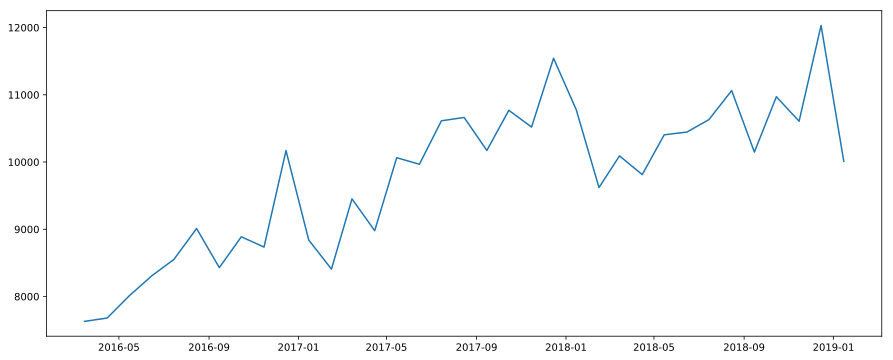

In [62]:
plt.plot(plot_data_time,plot_data)
plt.show()